<a href="https://colab.research.google.com/github/Abrazacs/classical_ml/blob/main/Onshore_Offshore_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


df = pd.read_csv('train_oil.csv', sep = ',')
df.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


# **1. Анализ данных**

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

In [361]:
df.describe(include = 'all')

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
count,309,309,282,271,271,309,282.00000,279.000000,309,309,309,309,309,309.000000,309,309,309.000000,309.000000,309.000000,309.000000
unique,285,258,42,7,93,55,NaN,NaN,138,3,4,13,43,NaN,22,13,NaN,NaN,NaN,NaN
top,ERSKINE,BRENT,USA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,NaN,NaN,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,NaN,CRETACEOUS,SANDSTONE,NaN,NaN,NaN,NaN
freq,3,8,80,110,24,72,NaN,NaN,28,218,231,88,78,NaN,78,184,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,35.62426,-12.508435,NaN,NaN,NaN,NaN,NaN,6755.669903,NaN,NaN,760.087379,183.683236,17.825178,476.994757
std,NaN,NaN,NaN,NaN,NaN,NaN,22.19116,86.387220,NaN,NaN,NaN,NaN,NaN,3628.094135,NaN,NaN,1353.934404,282.252489,7.171048,1000.140605
min,NaN,NaN,NaN,NaN,NaN,NaN,-38.39890,-151.615300,NaN,NaN,NaN,NaN,NaN,220.000000,NaN,NaN,11.000000,2.120000,1.100000,0.010000
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.24915,-102.336500,NaN,NaN,NaN,NaN,NaN,4059.000000,NaN,NaN,128.000000,45.000000,12.000000,10.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,38.13500,1.810000,NaN,NaN,NaN,NaN,NaN,6500.000000,NaN,NaN,312.000000,110.000000,17.000000,68.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,52.13360,56.179900,NaN,NaN,NaN,NaN,NaN,9186.000000,NaN,NaN,715.000000,205.000000,23.600000,390.000000


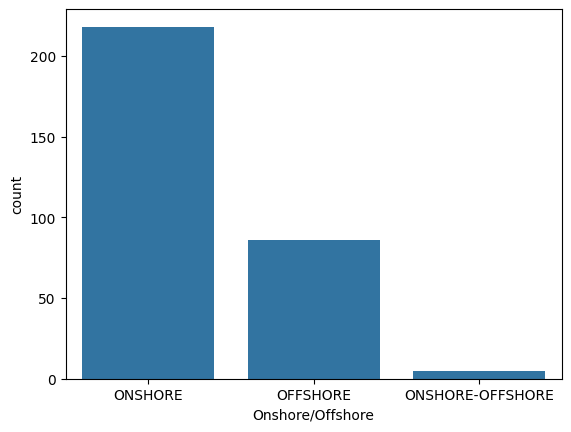

In [362]:
sns.countplot(x='Onshore/Offshore', data=df)
plt.show()

In [363]:
df['Onshore/Offshore'].value_counts()

,count
Onshore/Offshore,
ONSHORE,218
OFFSHORE,86
ONSHORE-OFFSHORE,5


Первичный анализ данных показывает, что у нас есть ряд колонок с пропуском данных (Region, Country, Basin name, Latitude, Longitude).

Также видно, что ряд категорианльных признаков,таких как Field name,	Reservoir unit, Operator company, Basin Name имеют очень уникальные значния и не несут практический смысл.

Кроме того, видно, что целевая переменная имеет сильный перекос в категорию ONSHORE и крайне мало значений в категории ONSHORE-OFFSHORE

# **1.1 Распределение признаков по целевому значению**

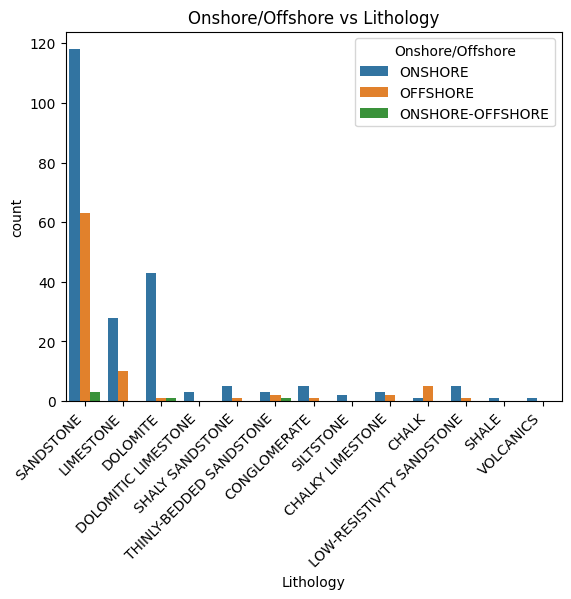

In [364]:
sns.countplot(x='Lithology', hue='Onshore/Offshore', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Onshore/Offshore vs Lithology')
plt.show()

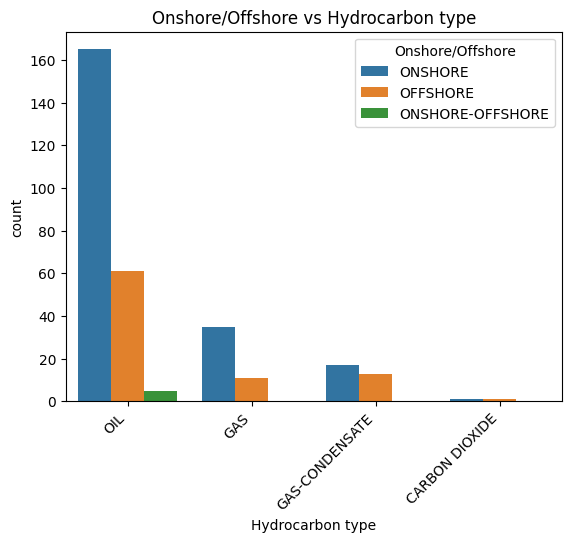

In [365]:
sns.countplot(x='Hydrocarbon type', hue='Onshore/Offshore', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Onshore/Offshore vs Hydrocarbon type')
plt.show()

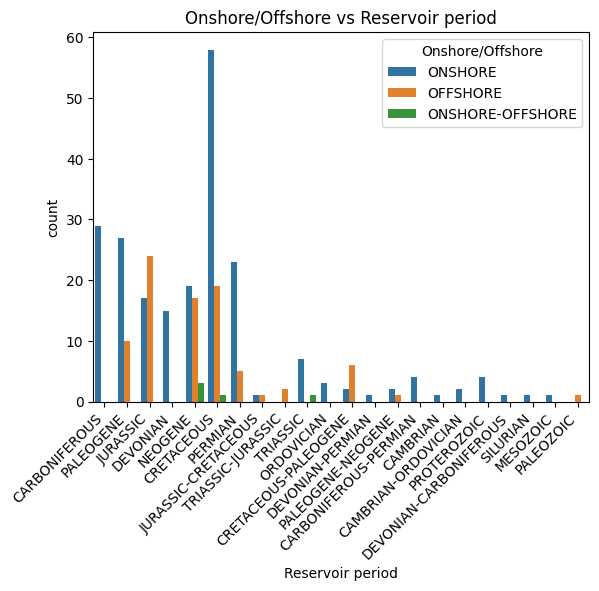

In [366]:
sns.countplot(x='Reservoir period', hue='Onshore/Offshore', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Onshore/Offshore vs Reservoir period')
plt.show()

In [367]:
onshore_data = df[df['Onshore/Offshore'] == 'ONSHORE']
offshore_data = df[df['Onshore/Offshore'] == 'OFFSHORE']
onshore_offshore_data = df[df['Onshore/Offshore'] == 'ONSHORE-OFFSHORE']

# Вспомогательная функция, которая строит график распределения признака по таргетному значению
def create_histplot_for_column_by_target(column_name):
    sns.histplot(onshore_data[column_name], kde=True)
    plt.title(f'Распределение {column_name} для Onshore')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.show()

    sns.histplot(offshore_data[column_name], kde=True)
    plt.title(f'Распределение {column_name} для Offshore')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.show()


    sns.histplot(onshore_offshore_data[column_name], kde=True)
    plt.title(f'Распределение {column_name} для ONSHORE-OFFSHORE')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.show()

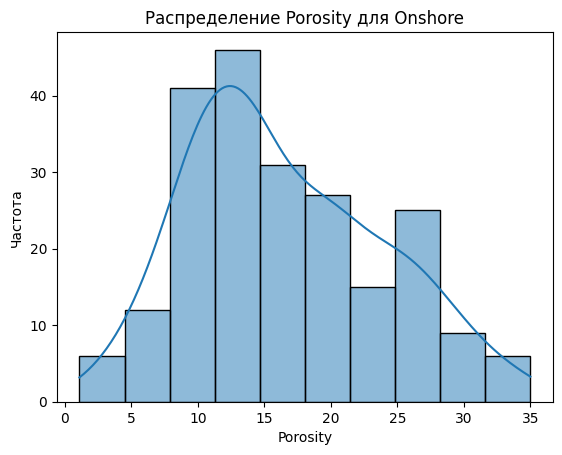

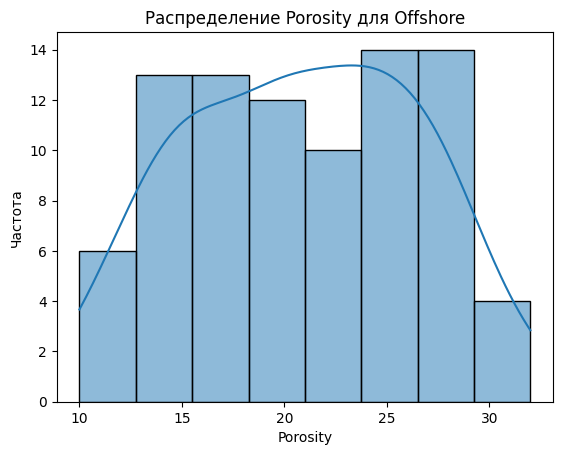

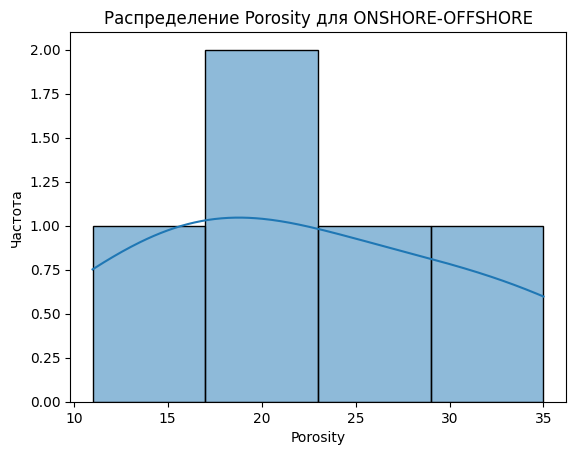

In [368]:
create_histplot_for_column_by_target('Porosity')

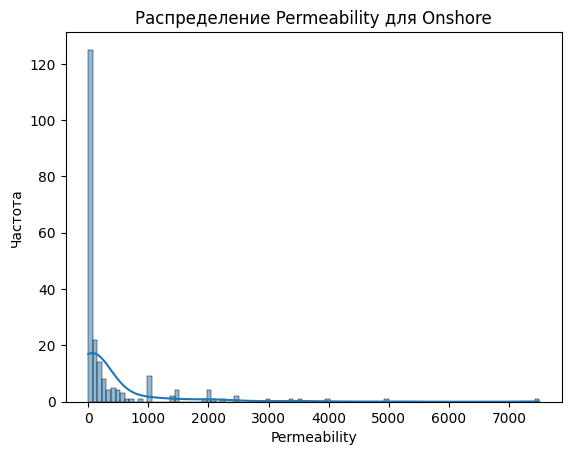

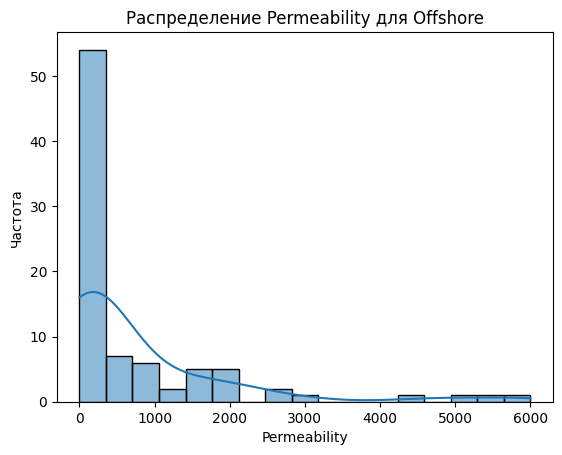

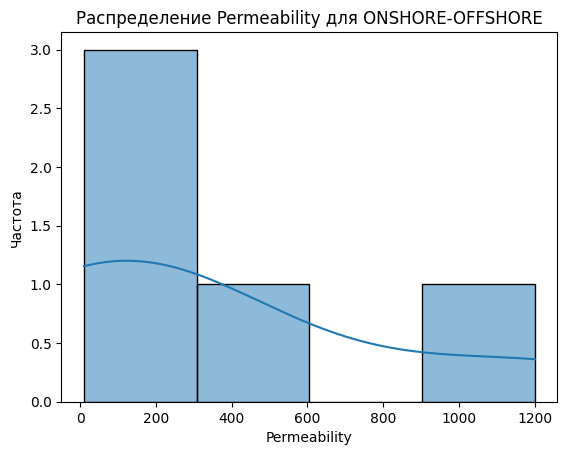

In [369]:
create_histplot_for_column_by_target('Permeability')

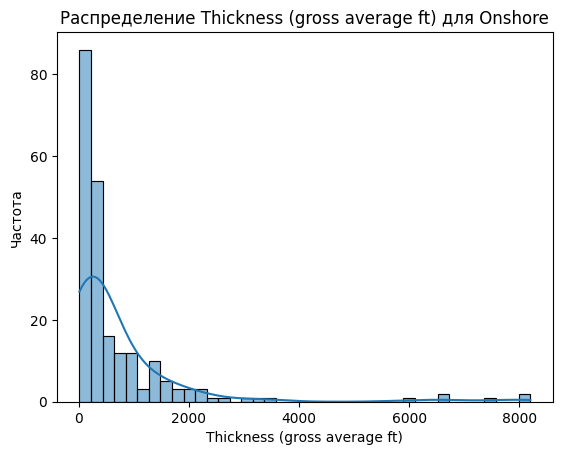

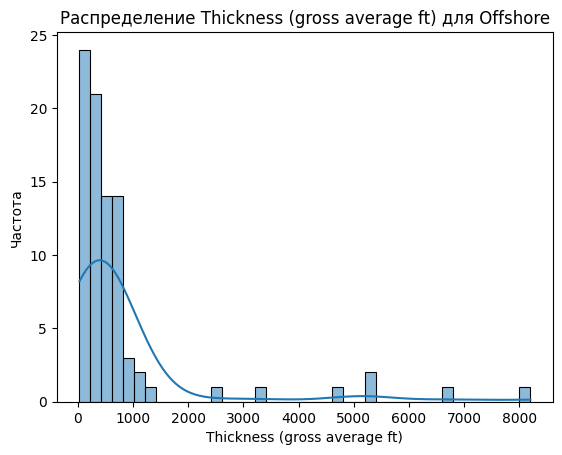

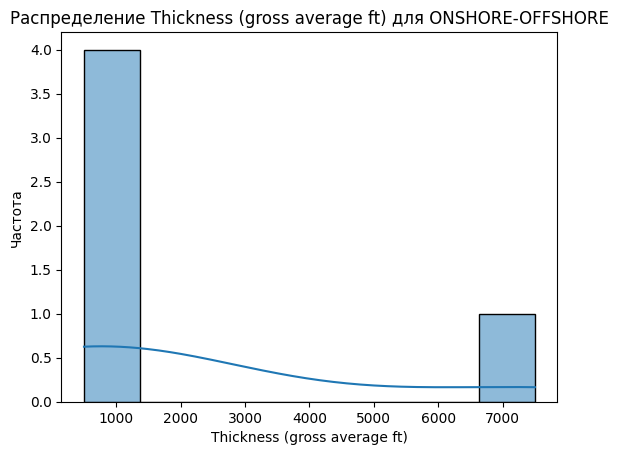

In [370]:
create_histplot_for_column_by_target('Thickness (gross average ft)')

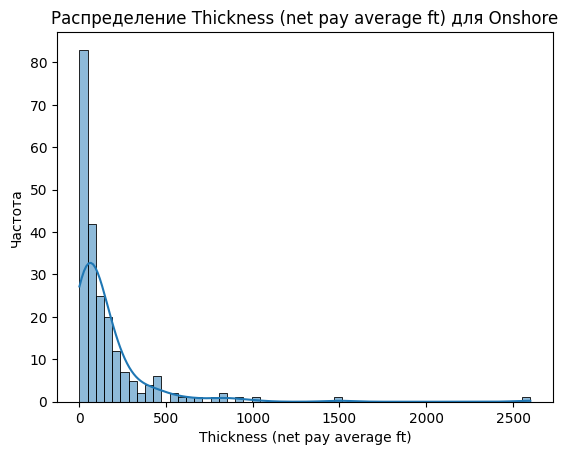

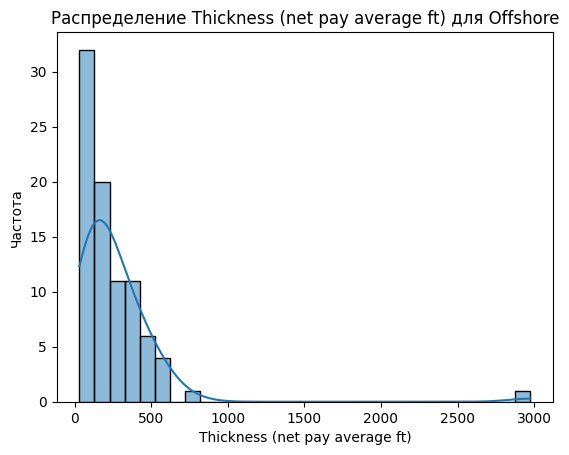

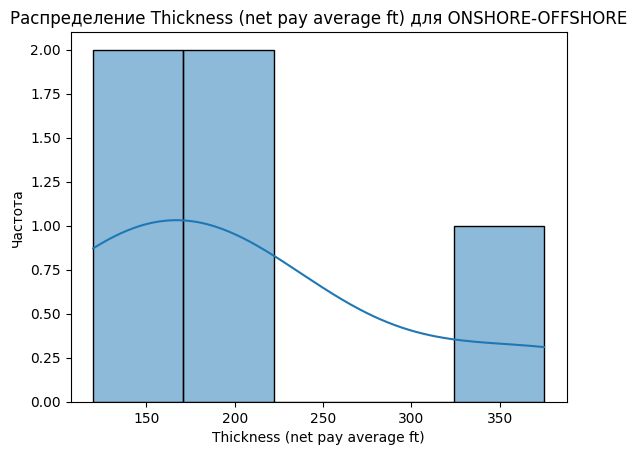

In [371]:
create_histplot_for_column_by_target('Thickness (net pay average ft)')

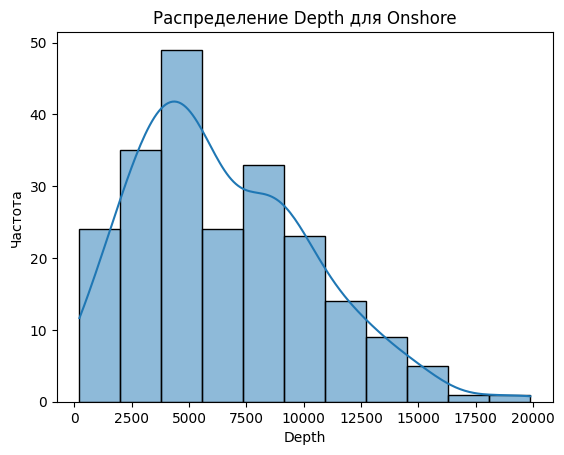

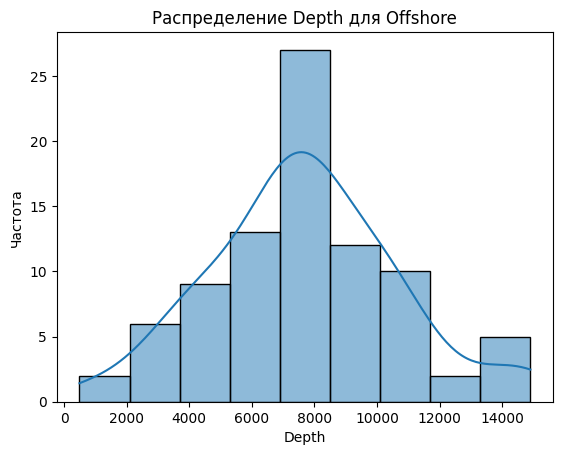

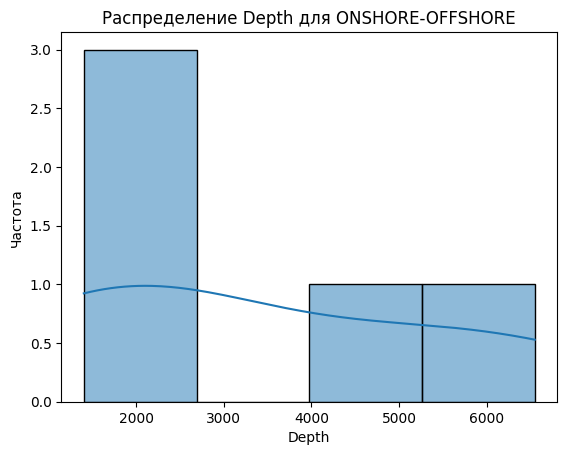

In [372]:
create_histplot_for_column_by_target('Depth')

# **2. Обработка DataFrame'а**

In [373]:
df.drop(['Field name', 'Reservoir unit', 'Operator company', 'Basin name', 'Reservoir status'], axis=1, inplace=True)

In [374]:
# Вспомогательная функция для генерации признаков из Tectonic regime и Structural setting
def create_additional_columns(column_name, df):
  attributes_set = set()
  for attributes in df[column_name].str.split('/'):
    for attribute in attributes:
      attributes_set.add(attribute+'_feature')

  for attribute in attributes_set:
    df[attribute] = df[column_name].str.contains(attribute.split('_')[0], regex=False).astype(int)
  return attributes_set

In [375]:
# Создаем дополнительные признаки и дропаем не нужные признаки
tectonic_attributes = create_additional_columns('Tectonic regime', df)
sctructural_attributes = create_additional_columns('Structural setting', df)
df.drop(['Tectonic regime', 'Structural setting'], axis=1, inplace=True)


In [377]:
# Кодируем категориальные признаки, в которых нет пропусков, и таргет
hc_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
reservoir_period_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
lithology_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
target_encoder = LabelEncoder()

encoded_hc = hc_encoder.fit_transform(df[['Hydrocarbon type']])
encoded_reservoir_period = reservoir_period_encoder.fit_transform(df[['Reservoir period']])
encoded_lithology = lithology_encoder.fit_transform(df[['Lithology']])

hc_feature_names = hc_encoder.get_feature_names_out(['Hydrocarbon type'])
reservoir_period_feature_names = reservoir_period_encoder.get_feature_names_out(['Reservoir period'])
lithology_feature_names = lithology_encoder.get_feature_names_out(['Lithology'])

encoded_hc_df = pd.DataFrame(encoded_hc, columns=hc_feature_names, index=df.index)
encoded_reservoir_period_df = pd.DataFrame(encoded_reservoir_period, columns=reservoir_period_feature_names, index=df.index)
encoded_lithology_df = pd.DataFrame(encoded_lithology, columns=lithology_feature_names, index=df.index)

df = pd.concat([df.drop(['Hydrocarbon type'], axis=1), encoded_hc_df], axis=1)
df = pd.concat([df.drop(['Reservoir period'], axis=1), encoded_reservoir_period_df], axis=1)
df = pd.concat([df.drop(['Lithology'], axis=1), encoded_lithology_df], axis=1)

df['Onshore/Offshore'] = target_encoder.fit_transform(df['Onshore/Offshore'])

In [378]:
X = df.drop(['Onshore/Offshore'], axis=1)
y = df['Onshore/Offshore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [379]:
X_train[X_train['Country'].isnull()]

,Country,Region,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability,STRIKE-SLIP_feature,...,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SHALY SANDSTONE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS
148,NaN,NaN,NaN,NaN,4810,600.0,40.0,9.9,9.00,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,NaN,NaN,NaN,NaN,7595,541.0,367.0,20.0,200.00,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
79,NaN,NaN,NaN,NaN,12550,1000.0,650.0,6.0,5.00,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15,NaN,NaN,NaN,NaN,9940,360.0,290.0,16.0,100.00,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37,NaN,NaN,NaN,NaN,10744,410.0,377.0,16.5,300.00,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55,NaN,NaN,NaN,NaN,13780,98.0,79.0,6.0,0.77,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,NaN,NaN,NaN,NaN,11500,300.0,60.0,10.0,100.00,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,NaN,NaN,NaN,NaN,6150,245.0,210.0,13.0,1000.00,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,NaN,NaN,NaN,NaN,15460,270.0,35.0,12.8,79.00,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35,NaN,NaN,NaN,NaN,3440,920.0,436.0,21.0,235.00,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Т.к. для пропусков в колонках стране и регион также пропущены широта и долгота, то привязаться к ккординатам мы не можем.

Попробуем найти другие признаки, которые коррелируют со странной и регионом.

In [380]:
filtered_data = df[df['Country'].notna()]
pre_country_encoder = LabelEncoder()
pre_region_encoder = LabelEncoder()
filtered_data.loc[:, 'Country'] = pre_country_encoder.fit_transform(filtered_data['Country'])
filtered_data.loc[:, 'Region'] = pre_region_encoder.fit_transform(filtered_data['Region'])

<ipython-input-381-9a5440264a49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(feature_columns, axis=1, inplace=True)


,Country,Region,Latitude,Longitude,Onshore/Offshore,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability,...,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SHALY SANDSTONE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS
Country,1.000000,0.278138,0.208850,-0.370300,0.064424,0.195940,-0.060473,-0.048289,-0.100134,-0.172091,...,0.124711,0.051488,0.015960,-0.093620,-0.133079,0.063370,0.153149,-0.011826,0.057569,-0.075847
Region,0.278138,1.000000,0.104458,-0.653096,0.437894,-0.066444,-0.094808,-0.157963,-0.253847,-0.195763,...,0.282427,0.083135,0.099363,-0.079038,-0.251197,0.056694,0.096291,0.099164,-0.100954,-0.049713
Latitude,0.208850,0.104458,1.000000,-0.323446,0.090542,0.137568,-0.060014,-0.038955,-0.177277,-0.159048,...,0.105051,0.032435,-0.072325,-0.039702,-0.022476,0.025125,0.022212,0.019836,-0.022671,0.006963
Longitude,-0.370300,-0.653096,-0.323446,1.000000,-0.283619,-0.095084,0.210117,0.156536,0.261563,0.151979,...,-0.329638,-0.045850,0.067359,0.012409,0.234333,-0.050183,-0.125340,-0.093177,0.010868,0.090117
Onshore/Offshore,0.064424,0.437894,0.090542,-0.283619,1.000000,-0.190316,0.028256,-0.147387,-0.236361,-0.175233,...,0.226234,0.059445,0.006486,0.032932,-0.168817,0.034199,0.032932,0.048450,0.032932,0.034199
Depth,0.195940,-0.066444,0.137568,-0.095084,-0.190316,1.000000,0.023310,0.172243,-0.384382,-0.219274,...,0.074081,-0.099481,0.031613,-0.059357,-0.035153,-0.102460,0.077076,-0.114999,-0.044879,0.051485
Thickness (gross average ft),-0.060473,-0.094808,-0.060014,0.210117,0.028256,0.023310,1.000000,0.500174,-0.038899,-0.092258,...,-0.064874,-0.012946,0.003560,-0.051345,0.062008,-0.028594,-0.048969,-0.029759,0.123401,-0.011596
Thickness (net pay average ft),-0.048289,-0.157963,-0.038955,0.156536,-0.147387,0.172243,0.500174,1.000000,-0.067821,-0.058085,...,-0.098349,0.018732,0.181697,-0.054982,-0.060807,-0.021148,-0.042603,-0.035793,0.027346,0.002317
Porosity,-0.100134,-0.253847,-0.177277,0.261563,-0.236361,-0.384382,-0.038899,-0.067821,1.000000,0.487523,...,-0.402691,-0.122957,-0.084921,0.099478,0.254604,-0.118502,0.096006,-0.066379,0.127256,-0.045168
Permeability,-0.172091,-0.195763,-0.159048,0.151979,-0.175233,-0.219274,-0.092258,-0.058085,0.487523,1.000000,...,-0.169816,-0.049401,-0.111736,-0.037248,0.290133,-0.027959,-0.032835,-0.039734,0.006046,-0.028332


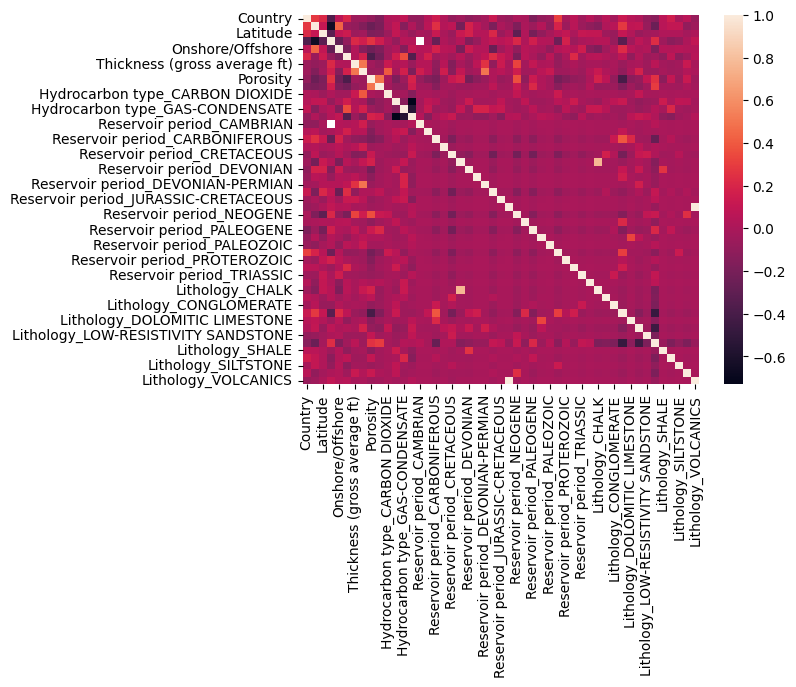

In [381]:
feature_columns = [col for col in df.columns if '_feature' in col]
filtered_data.drop(feature_columns, axis=1, inplace=True)
sns.heatmap(filtered_data.corr())
filtered_data.corr()

Из представленных данных видно, что колонки Country, Region, Latitude не имеют значимой корреляции с другими колонками. В связи с чем Country, Region, Latitude и Longitude надо удалить.

Также мы видим связь между Thickness (gross average ft) и Thickness (net pay average ft), а также Porosity и Permeability. Связь не сильная, т.ч. эти колонки не будем трогать.

In [382]:
X_train.drop(['Country', 'Region', 'Latitude', 'Longitude'], axis=1, inplace=True)
X_test.drop(['Country', 'Region', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [383]:
# Нормируем
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [384]:
# Генерируем синтетические данные
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

adasyn = ADASYN(random_state=42, n_neighbors=3)
X_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# **3. Подбор модели**

In [385]:
# Вспомогательная функция для преобразования мапы c метриками по моделям в df для дальнейшей обработки
def get_results(models_map):
  results = pd.DataFrame(models_map).T.reset_index()
  results.columns = ['Name', 'Accuracy', 'Recall', 'Precission', 'F1']
  return results

# Вспомогательная функция для построения графика по метрикам моделей.
def create_plot(results, _title):
  x_values = results['Name']
  accuracy = results['Accuracy']
  recall = results['Recall']
  precision = results['Precission']
  f1 = results['F1']

  plt.figure(figsize=(12, 6))

  plt.plot(x_values, accuracy, label='Accuracy')
  plt.plot(x_values, recall, label='Recall')
  plt.plot(x_values, precision, label='Precision')
  plt.plot(x_values, f1, label='F1')

  plt.xlabel('Модель')
  plt.ylabel('Значение метрики')
  plt.title(_title)
  plt.legend()
  plt.grid(True)

  plt.xticks(rotation=90, ha='right')

  plt.tight_layout()

In [386]:
knn_clear_map = {}

for i in range (3, 101, 2):
  scores = []
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))
  scores.append(recall_score(y_test, y_pred, average='weighted'))
  scores.append(precision_score(y_test, y_pred, average='weighted'))
  scores.append(f1_score(y_test, y_pred, average='weighted'))
  knn_clear_map[f'KNN_clear_{i}'] = scores

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

,Accuracy,Recall,Precission,F1
count,49.000000,49.000000,49.000000,49.000000
mean,0.705069,0.705069,0.591626,0.630563
std,0.022571,0.022571,0.107428,0.070629
min,0.677419,0.677419,0.477525,0.560174
25%,0.693548,0.693548,0.481009,0.568049
50%,0.693548,0.693548,0.578732,0.585208
75%,0.725806,0.725806,0.700509,0.709146
max,0.741935,0.741935,0.732598,0.737140


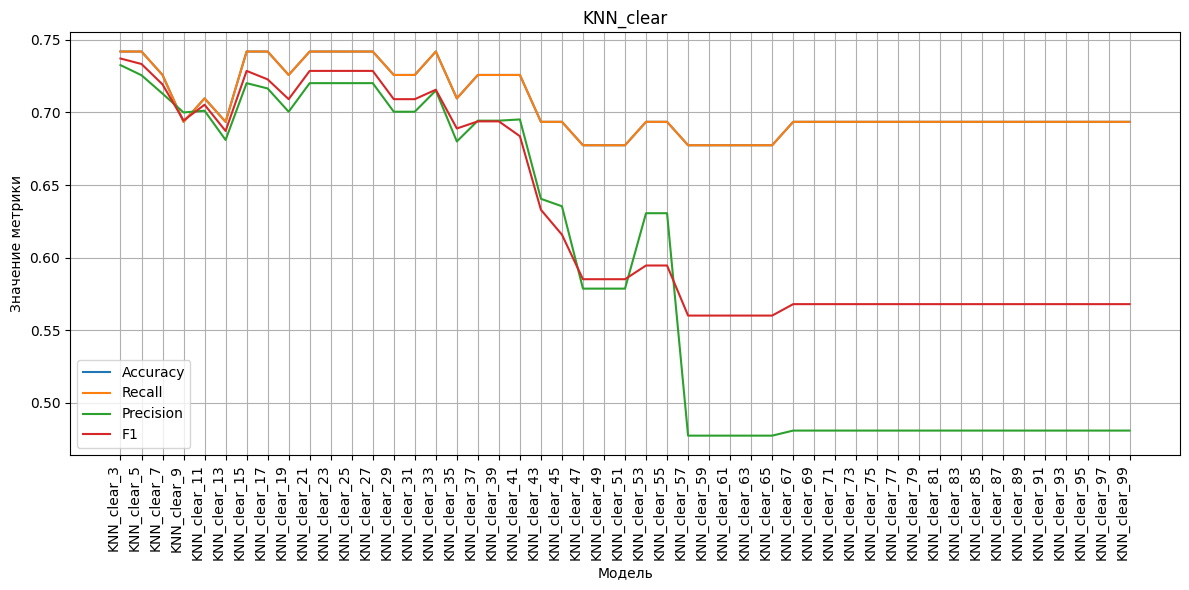

In [389]:
result = get_results(knn_clear_map)
create_plot(result, 'KNN_clear')
result.describe()

In [390]:
knn_smote_map = {}

for i in range (3, 101, 2):
  scores = []
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train_resampled_smote, y_train_resampled_smote)
  y_pred = model.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))
  scores.append(recall_score(y_test, y_pred, average='weighted'))
  scores.append(precision_score(y_test, y_pred, average='weighted'))
  scores.append(f1_score(y_test, y_pred, average='weighted'))
  knn_smote_map[f'KNN_smote_{i}'] = scores

,Accuracy,Recall,Precission,F1
count,49.000000,49.000000,49.000000,49.000000
mean,0.460829,0.460829,0.840520,0.489411
std,0.119299,0.119299,0.021804,0.122214
min,0.290323,0.290323,0.760166,0.276162
25%,0.370968,0.370968,0.839478,0.403447
50%,0.419355,0.419355,0.850396,0.448373
75%,0.564516,0.564516,0.850473,0.596610
max,0.790323,0.790323,0.859531,0.795474


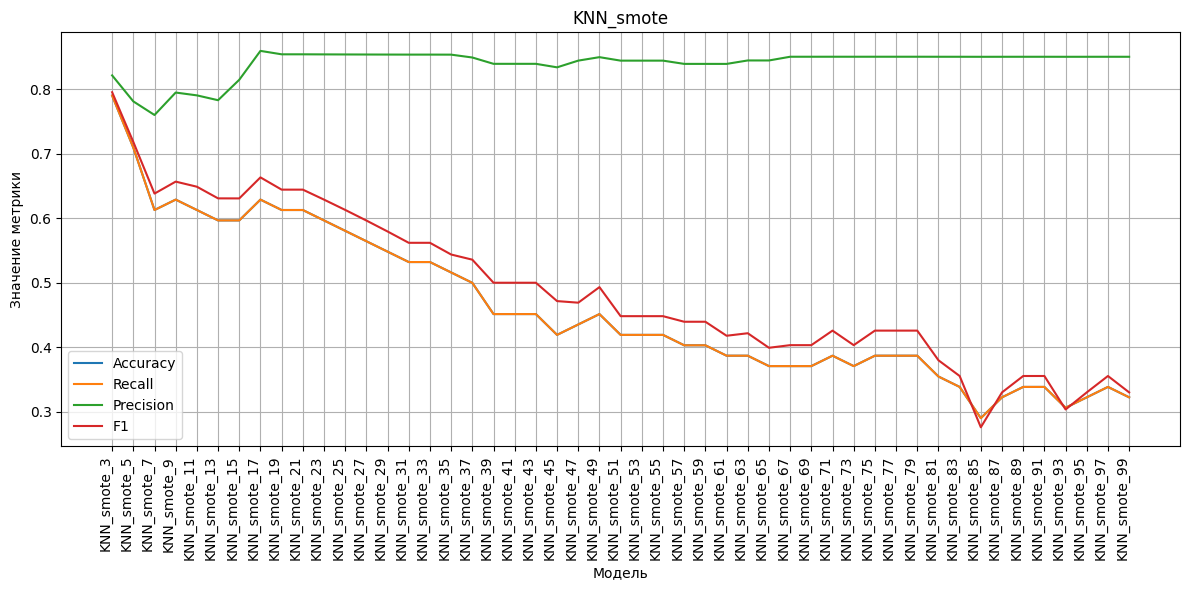

In [391]:
result = get_results(knn_smote_map)
create_plot(result, 'KNN_smote')
result.describe()

In [392]:
knn_adasyn_map = {}

for i in range (3, 101, 2):
  scores = []
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train_resampled_adasyn, y_train_resampled_adasyn)
  y_pred = model.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))
  scores.append(recall_score(y_test, y_pred, average='weighted'))
  scores.append(precision_score(y_test, y_pred, average='weighted'))
  scores.append(f1_score(y_test, y_pred, average='weighted'))
  knn_adasyn_map[f'KNN_adasyn_{i}'] = scores

,Accuracy,Recall,Precission,F1
count,49.000000,49.000000,49.000000,49.000000
mean,0.463792,0.463792,0.840032,0.492342
std,0.109715,0.109715,0.019975,0.109967
min,0.322581,0.322581,0.752016,0.308432
25%,0.387097,0.387097,0.839382,0.430656
50%,0.419355,0.419355,0.845054,0.448373
75%,0.548387,0.548387,0.849395,0.575732
max,0.741935,0.741935,0.854533,0.749229


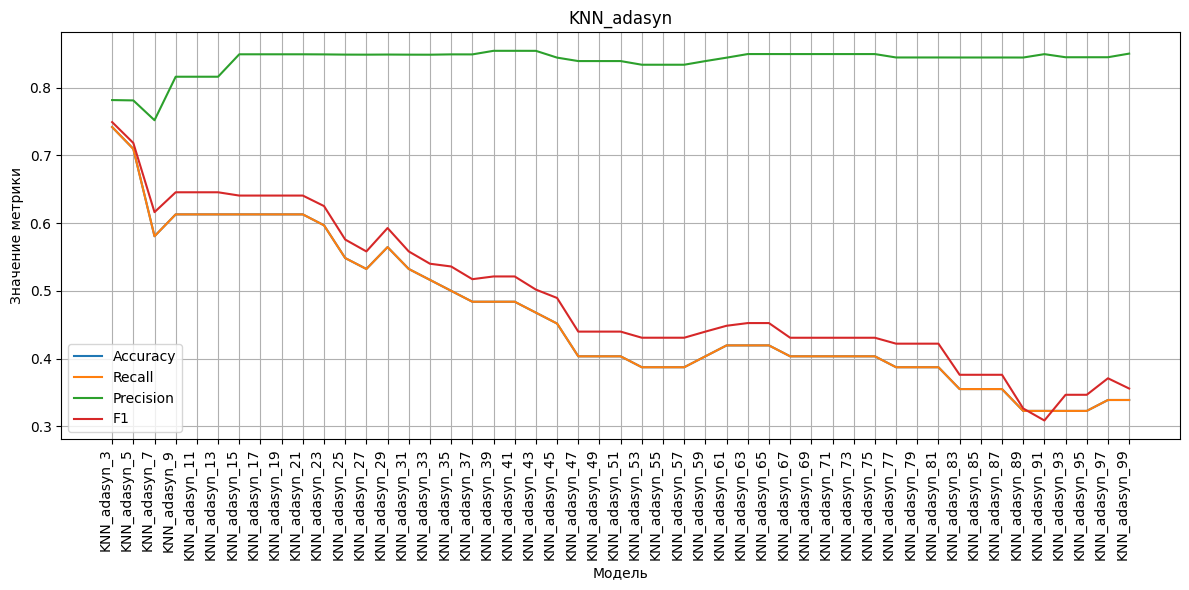

In [393]:
result = get_results(knn_adasyn_map)
create_plot(result, 'KNN_adasyn')
result.describe()

In [394]:
parameters = {'n_estimators': np.arange(10, 60, 10),
              'min_samples_leaf': np.arange(3, 10, 1),
              'max_features': np.arange(4, 10, 2),
              'max_depth': np.arange(5, 20, 5)}

rfc_clear = RandomForestClassifier(random_state=42,n_jobs=-1, min_samples_leaf = 3)
gcv_rf_clear = GridSearchCV(rfc_clear, parameters, n_jobs=-1, verbose=1)
gcv_rf_clear.fit(X_train, y_train)
best_params = gcv_rf_clear.best_params_

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [395]:
best_params

{'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 6, 'n_estimators': 10}

In [396]:
rfc_clear = RandomForestClassifier(random_state=42,
                                   n_jobs=-1,
                                   min_samples_leaf = best_params['min_samples_leaf'],
                                   max_depth= best_params['max_depth'],
                                   max_features=best_params['max_features'],
                                   n_estimators=best_params['n_estimators'])
rfc_clear.fit(X_train, y_train)
y_pred = rfc_clear.predict(X_test)
scores = []
scores.append(accuracy_score(y_test, y_pred))
scores.append(recall_score(y_test, y_pred, average='weighted'))
scores.append(precision_score(y_test, y_pred, average='weighted'))
scores.append(f1_score(y_test, y_pred, average='weighted'))

scores

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[0.8709677419354839,
 0.8709677419354839,
 0.8566231983527797,
 0.8606386445096122]

In [397]:
rfc_smote = RandomForestClassifier(random_state=42,n_jobs=-1)
gcv_rfc_smote = GridSearchCV(rfc_smote, parameters, n_jobs=-1, verbose=1)
gcv_rfc_smote.fit(X_train_resampled_smote, y_train_resampled_smote)
best_params_rfc_smote = gcv_rfc_smote.best_params_

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


In [398]:
best_params_rfc_smote

{'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 20}

In [399]:
rfc_smote = RandomForestClassifier(random_state=42,n_jobs=-1,
                                   min_samples_leaf=best_params_rfc_smote['min_samples_leaf'],
                                    max_depth=best_params_rfc_smote['max_depth'],
                                    max_features=best_params_rfc_smote['max_features'],
                                    n_estimators=best_params_rfc_smote['n_estimators'])
rfc_smote.fit(X_train_resampled_smote, y_train_resampled_smote)
y_pred = rfc_smote.predict(X_test)
scores = []
scores.append(accuracy_score(y_test, y_pred))
scores.append(recall_score(y_test, y_pred, average='weighted'))
scores.append(precision_score(y_test, y_pred, average='weighted'))
scores.append(f1_score(y_test, y_pred, average='weighted'))

scores

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[0.7741935483870968, 0.7741935483870968, 0.792763731473409, 0.7747280570142536]

In [400]:
rfc_adasyn = RandomForestClassifier(random_state=42,n_jobs=-1)
gcv_rfc_adasyn = GridSearchCV(rfc_adasyn, parameters, n_jobs=-1, verbose=1)
gcv_rfc_adasyn.fit(X_train_resampled_adasyn, y_train_resampled_adasyn)
best_params_rfc_adasyn = gcv_rfc_smote.best_params_

best_params_rfc_adasyn

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


{'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 20}

In [401]:
rfc_adasyn = RandomForestClassifier(random_state=42,
                                    n_jobs=-1,
                                    min_samples_leaf=best_params_rfc_adasyn['min_samples_leaf'],
                                    max_depth=best_params_rfc_adasyn['max_depth'],
                                    max_features=best_params_rfc_adasyn['max_features'],
                                    n_estimators=best_params_rfc_adasyn['n_estimators'])
rfc_adasyn.fit(X_train_resampled_adasyn, y_train_resampled_adasyn)
y_pred = rfc_adasyn.predict(X_test)
scores = []
scores.append(accuracy_score(y_test, y_pred))
scores.append(recall_score(y_test, y_pred, average='weighted'))
scores.append(precision_score(y_test, y_pred, average='weighted'))
scores.append(f1_score(y_test, y_pred, average='weighted'))

scores

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[0.7580645161290323, 0.7580645161290323, 0.7839812517231871, 0.759809198559709]

In [402]:
knn_clear_map_res = get_results(knn_clear_map)
max_f1 = knn_clear_map_res['F1'].max()
best_rows = knn_clear_map_res[knn_clear_map_res['F1'] == max_f1]
best_rows

,Name,Accuracy,Recall,Precission,F1
0,KNN_clear_3,0.741935,0.741935,0.732598,0.73714


Науилучшие оценки показала модель RandomForest на чистых данных с параметрами 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 6, 'n_estimators': 10

# **4. Предсказание**

In [407]:
df_test = pd.read_csv('oil_test.csv', sep = ',')
df_test.drop(['Field name',
              'Reservoir unit',
              'Operator company',
              'Basin name',
              'Reservoir status',
              'Country',
              'Region',
              'Latitude',
              'Longitude'],
             axis=1, inplace=True)

for attribute in tectonic_attributes:
    df_test[attribute] = df_test['Tectonic regime'].str.contains(attribute.split('_')[0], regex=False).astype(int)

for attribute in sctructural_attributes:
    df_test[attribute] = df_test['Structural setting'].str.contains(attribute.split('_')[0], regex=False).astype(int)

df_test.drop(['Tectonic regime', 'Structural setting'], axis=1, inplace=True)

encoded_hc = hc_encoder.transform(df_test[['Hydrocarbon type']])
encoded_reservoir_period = reservoir_period_encoder.transform(df_test[['Reservoir period']])
encoded_lithology = lithology_encoder.transform(df_test[['Lithology']])

hc_feature_names = hc_encoder.get_feature_names_out(['Hydrocarbon type'])
reservoir_period_feature_names = reservoir_period_encoder.get_feature_names_out(['Reservoir period'])
lithology_feature_names = lithology_encoder.get_feature_names_out(['Lithology'])

encoded_hc_df = pd.DataFrame(encoded_hc, columns=hc_feature_names, index=df_test.index)
encoded_reservoir_period_df = pd.DataFrame(encoded_reservoir_period, columns=reservoir_period_feature_names, index=df_test.index)
encoded_lithology_df = pd.DataFrame(encoded_lithology, columns=lithology_feature_names, index=df_test.index)

df_test = pd.concat([df_test.drop(['Hydrocarbon type'], axis=1), encoded_hc_df], axis=1)
df_test = pd.concat([df_test.drop(['Reservoir period'], axis=1), encoded_reservoir_period_df], axis=1)
df_test = pd.concat([df_test.drop(['Lithology'], axis=1), encoded_lithology_df], axis=1)

X_test = df_test
X_train = df.drop(['Onshore/Offshore','Country', 'Region','Latitude','Longitude'], axis=1)
y_train = df['Onshore/Offshore']

X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [408]:
model = RandomForestClassifier(random_state=42,
                               n_jobs=-1,
                               min_samples_leaf = best_params['min_samples_leaf'],
                               max_depth= best_params['max_depth'],
                               max_features=best_params['max_features'],
                               n_estimators=best_params['n_estimators'])
model.fit(X_train, y_train)
prediction = model.predict(X_test)

predictions_df = pd.DataFrame({'Onshore/Offshore': prediction})
predictions_df.reset_index(inplace=True)
predictions_df.to_csv('RFC_clear.csv', index=False)
